In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

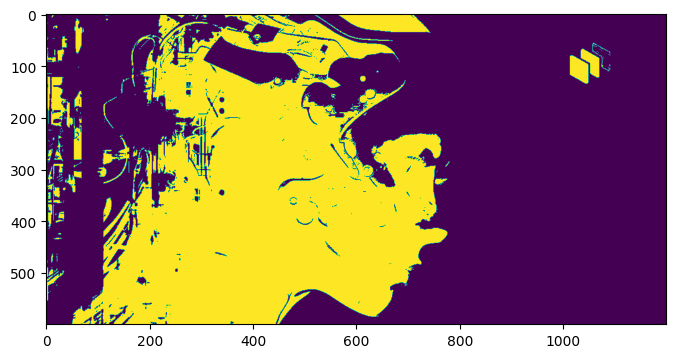

In [2]:
image = cv2.imread("C:\\Users\\DELL\\Downloads\\artificial_intelligence.jpg")  
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

pixels = image.reshape(-1, 3)

kmeans = KMeans(n_clusters=2)  
kmeans.fit(pixels)

labels = kmeans.labels_

segmented_image = labels.reshape(image.shape[0], image.shape[1])

plt.figure(figsize=(8, 8))
plt.imshow(segmented_image, cmap='viridis')  
plt.show()


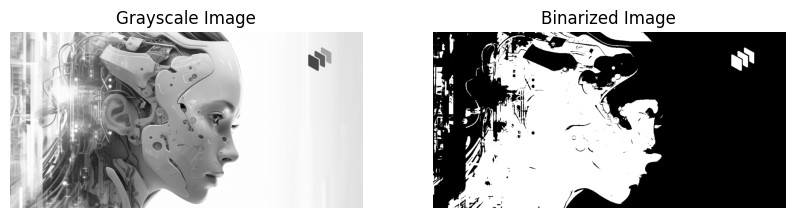

In [3]:

# Load and convert image to RGB
image = cv2.imread("C:\\Users\\DELL\\Downloads\\artificial_intelligence.jpg")  
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Reshape the grayscale image to 1D array for clustering
pixels_gray = gray_image.reshape(-1, 1)

# Apply KMeans clustering for binarization
kmeans_bin = KMeans(n_clusters=2, random_state=42)
kmeans_bin.fit(pixels_gray)

# Get cluster labels and reshape to original image size
labels_bin = kmeans_bin.labels_.reshape(gray_image.shape)

# Create binary image based on the cluster labels
binary_img = np.zeros_like(gray_image)
binary_img[labels_bin == 0] = 0        
binary_img[labels_bin == 1] = 255      

# Plot the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Grayscale Image")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Binarized Image")
plt.imshow(binary_img, cmap='gray')
plt.axis('off')

plt.show()


Accuracy: 0.9888888888888889


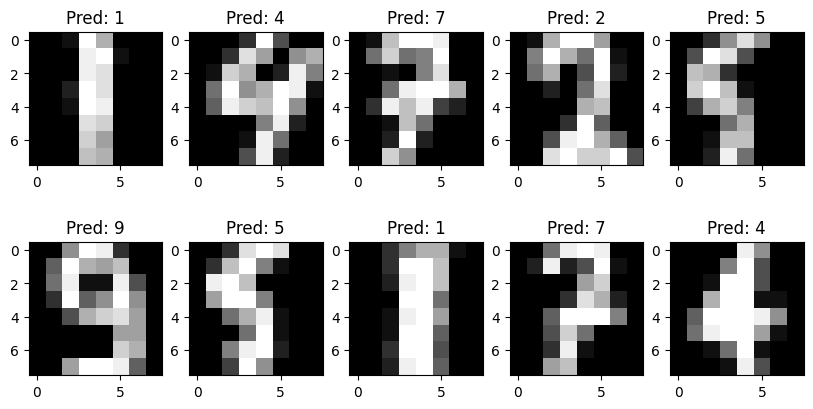

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load digits dataset
digits = datasets.load_digits()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Display results
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Display some of the images and their predictions
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title(f'Pred: {y_pred[i]}')
plt.show()
